In [1]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torch import  nn
from torchvision import transforms ,datasets
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.optim.lr_scheduler as lr_scheduler

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [2]:
Transform=transforms.Compose(
    [transforms.ToTensor()]
)

In [3]:
TrainData=datasets.MNIST(root="/home/yash/CNN_Data/",download=True,train=True,transform=Transform)
TestData=datasets.MNIST(root="/home/yash/CNN_Data/",download=True,train=False,transform=Transform)
TrainDataSet=DataLoader(TrainData,batch_size=64)
# TestDataSet=DataLoader(TestData,int(len(TestData)))

100%|██████████| 9912422/9912422 [00:00<00:00, 11264148.01it/s]


Extracting /home/yash/CNN_Data/MNIST/raw/train-images-idx3-ubyte.gz to /home/yash/CNN_Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11134818.81it/s]

Extracting /home/yash/CNN_Data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/yash/CNN_Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3167179.61it/s]


Extracting /home/yash/CNN_Data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/yash/CNN_Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13549451.47it/s]

Extracting /home/yash/CNN_Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/yash/CNN_Data/MNIST/raw



In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.Encoder=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=28*28,out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=12),
            nn.ReLU(),
            nn.Linear(in_features=12,out_features=5)
        )

        self.Decoder=nn.Sequential(
            nn.Linear(in_features=5,out_features=12),
            nn.ReLU(),
            nn.Linear(in_features=12,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512,out_features=28*28),
            nn.Sigmoid()
        )

    def forward(self,Dataset):
        Encoded=self.Encoder(Dataset)
        Decoded=self.Decoder(Encoded)
        return Decoded
        

In [5]:
model = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)


In [6]:
EpochsNo=20
outputs=[]


for epoch in range(EpochsNo):
    for (img,_) in TrainDataSet:
        img=img.to(device)
        img=img.reshape(-1,28*28)
        recon=model(img)
        loss=criterion(recon,img)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))


Epoch:1, Loss:0.0464
Epoch:2, Loss:0.0370
Epoch:3, Loss:0.0349
Epoch:4, Loss:0.0331
Epoch:5, Loss:0.0327
Epoch:6, Loss:0.0325
Epoch:7, Loss:0.0315
Epoch:8, Loss:0.0309
Epoch:9, Loss:0.0309
Epoch:10, Loss:0.0308
Epoch:11, Loss:0.0302
Epoch:12, Loss:0.0298
Epoch:13, Loss:0.0296
Epoch:14, Loss:0.0292
Epoch:15, Loss:0.0286
Epoch:16, Loss:0.0286
Epoch:17, Loss:0.0289
Epoch:18, Loss:0.0278
Epoch:19, Loss:0.0277
Epoch:20, Loss:0.0281


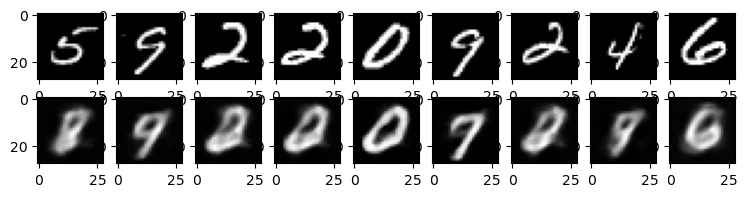

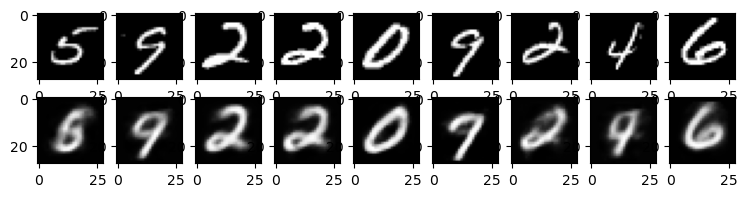

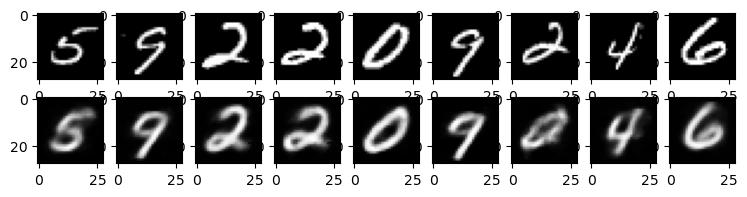

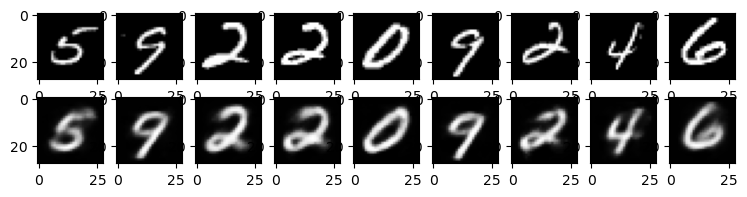

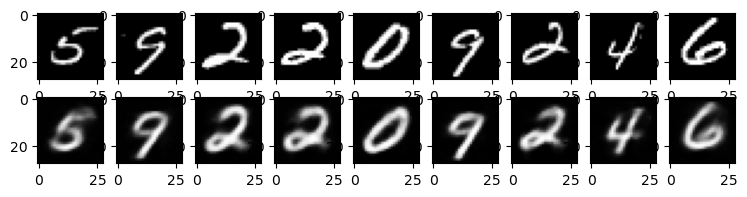

In [7]:


for k in range(0, EpochsNo, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = (outputs[k][1].to("cpu")).detach().numpy()
    recon = (outputs[k][2].to("cpu")).detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

